In [14]:
import numpy as np
import pandas as pd
from sklearn.model_selection import KFold, GridSearchCV, train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import re

url = 'https://raw.githubusercontent.com/liyuhao413/filepit/main/world-data-2023.csv'
data = pd.read_csv(url)
data.head()

,Country,Density\n(P/Km2),Abbreviation,Agricultural Land( %),Land Area(Km2),Armed Forces size,Birth Rate,Calling Code,Capital/Major City,Co2-Emissions,...,Out of pocket health expenditure,Physicians per thousand,Population,Population: Labor force participation (%),Tax revenue (%),Total tax rate,Unemployment rate,Urban_population,Latitude,Longitude
0,Afghanistan,60,AF,58.10%,"652,230","323,000",32.49,93.0,Kabul,"8,672",...,78.40%,0.28,"38,041,754",48.90%,9.30%,71.40%,11.12%,"9,797,273",33.939110,67.709953
1,Albania,105,AL,43.10%,"28,748","9,000",11.78,355.0,Tirana,"4,536",...,56.90%,1.20,"2,854,191",55.70%,18.60%,36.60%,12.33%,"1,747,593",41.153332,20.168331
2,Algeria,18,DZ,17.40%,"2,381,741","317,000",24.28,213.0,Algiers,"150,006",...,28.10%,1.72,"43,053,054",41.20%,37.20%,66.10%,11.70%,"31,510,100",28.033886,1.659626
3,Andorra,164,AD,40.00%,468,NaN,7.20,376.0,Andorra la Vella,469,...,36.40%,3.33,"77,142",NaN,NaN,NaN,NaN,"67,873",42.506285,1.521801
4,Angola,26,AO,47.50%,"1,246,700","117,000",40.73,244.0,Luanda,"34,693",...,33.40%,0.21,"31,825,295",77.50%,9.20%,49.10%,6.89%,"21,061,025",-11.202692,17.873887


In [15]:
import pandas as pd
import numpy as np
import re

def convert_to_numeric(value):
    if pd.isnull(value):
        return np.nan
    numeric_value = re.sub(r'[^0-9.]', '', str(value))
    try:
        return float(numeric_value)
    except ValueError:
        return np.nan

non_numeric_columns = ['Density\n(P/Km2)', 'Agricultural Land( %)', 'Land Area(Km2)', 'Armed Forces size',
                       'Co2-Emissions', 'CPI', 'CPI Change (%)', 'Forested Area (%)', 'Gasoline Price', 'GDP',
                       'Gross primary education enrollment (%)', 'Gross tertiary education enrollment (%)',
                       'Minimum wage', 'Out of pocket health expenditure', 'Population',
                       'Population: Labor force participation (%)', 'Tax revenue (%)', 'Total tax rate',
                       'Unemployment rate', 'Urban_population']

data_cleaned = data.copy()
for col in non_numeric_columns:
    data_cleaned[col] = data_cleaned[col].apply(convert_to_numeric)

missing_before = data.isnull().sum()
missing_after_conversion = data_cleaned.isnull().sum()

numeric_columns = data_cleaned.select_dtypes(include=['number']).columns
categorical_columns = data_cleaned.select_dtypes(include=['object']).columns

data_cleaned[numeric_columns] = data_cleaned[numeric_columns].fillna(data_cleaned[numeric_columns].median())
for col in categorical_columns:
    data_cleaned[col] = data_cleaned[col].fillna(data_cleaned[col].mode().iloc[0])

missing_after_cleaning = data_cleaned.isnull().sum()

summary_df = pd.DataFrame({
    'Before Cleaning': missing_before,
    'After Conversion': missing_after_conversion,
    'After Cleaning': missing_after_cleaning
})

styled_summary = summary_df.style.background_gradient(cmap='coolwarm')\
    .set_caption("Summary of Data Cleaning: Missing Values")\
    .applymap(lambda x: 'background-color: red' if pd.isnull(x) else '')\
    .set_properties(**{'text-align': 'center'})

styled_summary

C:\Users\super\AppData\Local\Temp\ipykernel_9228\553507424.py:56: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  styled_summary = summary_df.style.background_gradient(cmap='coolwarm')\


,Before Cleaning,After Conversion,After Cleaning
Country,0,0,0
Density (P/Km2),0,0,0
Abbreviation,7,7,0
Agricultural Land( %),7,7,0
Land Area(Km2),1,1,0
Armed Forces size,24,24,0
Birth Rate,6,6,0
Calling Code,1,1,0
Capital/Major City,3,3,0
Co2-Emissions,7,7,0


In [2]:
non_numeric_columns = ['Density\n(P/Km2)', 'Agricultural Land( %)', 'Land Area(Km2)', 'Armed Forces size', 
                       'Co2-Emissions', 'CPI', 'CPI Change (%)', 'Forested Area (%)', 'Gasoline Price', 'GDP',
                       'Gross primary education enrollment (%)', 'Gross tertiary education enrollment (%)', 
                       'Minimum wage', 'Out of pocket health expenditure', 'Population', 
                       'Population: Labor force participation (%)', 'Tax revenue (%)', 'Total tax rate', 
                       'Unemployment rate', 'Urban_population']

# Function to remove non-numeric characters and convert string to float
def convert_to_numeric(value):
    if pd.isnull(value):
        return None
    numeric_value = re.sub(r'[^0-9.]', '', str(value))
    try:
        return float(numeric_value)
    except ValueError:
        return None

data_cleaned = data.copy()
for col in non_numeric_columns:
    if col in data_cleaned.columns:
        data_cleaned[col] = data_cleaned[col].apply(convert_to_numeric)

numeric_columns = data_cleaned.select_dtypes(include=['float64', 'int64']).columns
categorical_columns = data_cleaned.select_dtypes(include=['object']).columns

data_cleaned[numeric_columns] = data_cleaned[numeric_columns].fillna(data_cleaned[numeric_columns].median())

for col in categorical_columns:
    data_cleaned[col] = data_cleaned[col].fillna(data_cleaned[col].mode().iloc[0])

print(data_cleaned.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 35 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Country                                    195 non-null    object 
 1   Density
(P/Km2)                            195 non-null    float64
 2   Abbreviation                               195 non-null    object 
 3   Agricultural Land( %)                      195 non-null    float64
 4   Land Area(Km2)                             195 non-null    float64
 5   Armed Forces size                          195 non-null    float64
 6   Birth Rate                                 195 non-null    float64
 7   Calling Code                               195 non-null    float64
 8   Capital/Major City                         195 non-null    object 
 9   Co2-Emissions                              195 non-null    float64
 10  CPI                       

In [3]:
numeric_data = data_cleaned.select_dtypes(include=[np.number])

correlation_matrix = numeric_data.corr()

life_expectancy_correlation = correlation_matrix['Life expectancy'].sort_values(ascending=False)

print(life_expectancy_correlation)

Life expectancy                              1.000000
Gross tertiary education enrollment (%)      0.714983
Physicians per thousand                      0.676769
Minimum wage                                 0.480282
Latitude                                     0.461138
Tax revenue (%)                              0.342315
Gasoline Price                               0.236204
GDP                                          0.174424
Co2-Emissions                                0.117827
Gross primary education enrollment (%)       0.093737
Armed Forces size                            0.071427
Urban_population                             0.069028
Density\n(P/Km2)                             0.064183
Land Area(Km2)                               0.052961
Population                                   0.007450
Forested Area (%)                            0.005924
Calling Code                                -0.033359
Unemployment rate                           -0.043603
Longitude                   

In [4]:
X = data_cleaned.drop(['Life expectancy', 'Country', 'Abbreviation', 'Calling Code', 'Capital/Major City', 'Currency-Code', 'Official language', 'Largest city'], axis=1)
y = data_cleaned['Life expectancy']
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initial feature selection using Random Forest
rf_initial = RandomForestRegressor(n_estimators=100, random_state=42)
rf_initial.fit(X_train_full, y_train_full)
feature_importances = pd.Series(rf_initial.feature_importances_, index=X_train_full.columns).sort_values(ascending=False)
print(feature_importances)

Infant mortality                             0.658916
Maternal mortality ratio                     0.189326
Birth Rate                                   0.043786
Fertility Rate                               0.014007
Physicians per thousand                      0.010939
Gasoline Price                               0.008161
Longitude                                    0.006679
GDP                                          0.006356
CPI Change (%)                               0.005672
Gross tertiary education enrollment (%)      0.005100
Gross primary education enrollment (%)       0.004687
Out of pocket health expenditure             0.004461
Minimum wage                                 0.004318
Latitude                                     0.003673
Population: Labor force participation (%)    0.003493
CPI                                          0.003372
Agricultural Land( %)                        0.003291
Total tax rate                               0.003232
Unemployment rate           

In [5]:
top_features = ['Infant mortality', 'Maternal mortality ratio', 'Birth Rate', 'Fertility Rate', 
                'Gross tertiary education enrollment (%)', 'Physicians per thousand', 'Minimum wage']

X_train_top_features = X_train_full[top_features]

kf = KFold(n_splits=5, shuffle=True, random_state=42)
fold_rmse = []
fold_mae = []
fold_r2 = []

# Perform k-fold cross-validation manually to calculate RMSE for each fold
for train_index, valid_index in kf.split(X_train_top_features):
    X_train, X_valid = X_train_top_features.iloc[train_index], X_train_top_features.iloc[valid_index]
    y_train, y_valid = y_train_full.iloc[train_index], y_train_full.iloc[valid_index]

    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)

    y_pred_valid = model.predict(X_valid)
    rmse = np.sqrt(mean_squared_error(y_valid, y_pred_valid))
    mae = mean_absolute_error(y_valid, y_pred_valid)
    r2 = r2_score(y_valid, y_pred_valid)
    
    fold_rmse.append(rmse)
    fold_mae.append(mae)
    fold_r2.append(r2)


print("RMSE for each fold:", fold_rmse)
print("Mean RMSE across all folds:", np.mean(fold_rmse))
print("Standard Deviation of RMSE across folds:", np.std(fold_rmse))

print("MAE for each fold:", fold_mae)
print("Mean MAE across all folds:", np.mean(fold_mae))
print("Standard Deviation of MAE across folds:", np.std(fold_mae))

print("R2 for each fold:", fold_r2)
print("Mean R2 across all folds:", np.mean(fold_r2))
print("Standard Deviation of R2 across folds:", np.std(fold_r2))

RMSE for each fold: [2.7845740585411054, 3.311348950347541, 2.0630325861732968, 2.9414848510628584, 3.0042476005085343]
Mean RMSE across all folds: 2.820937609326667
Standard Deviation of RMSE across folds: 0.415783550830486
MAE for each fold: [1.9834375000000126, 2.567870967741933, 1.5961612903225655, 2.171967741935488, 2.264161290322587]
Mean MAE across all folds: 2.116719758064517
Standard Deviation of MAE across folds: 0.321581727653308
R2 for each fold: [0.8616671634603643, 0.8255738263630037, 0.920814395788297, 0.7958260022826524, 0.7985131546950905]
Mean R2 across all folds: 0.8404789085178817
Standard Deviation of R2 across folds: 0.04664740221211392


In [6]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}
rf = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=kf, scoring='neg_mean_squared_error', verbose=2, n_jobs=-1)
grid_search.fit(X_train_top_features, y_train_full)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='neg_mean_squared_error', verbose=2)

In [7]:
best_model = grid_search.best_estimator_
X_test_top_features = X_test[top_features]
y_pred_test = best_model.predict(X_test_top_features)

rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
mae_test = mean_absolute_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)

print(f"Test RMSE: {rmse_test}")
print(f"Test MAE: {mae_test}")
print(f"Test R2 Score: {r2_test}")

Test RMSE: 2.89861662830418
Test MAE: 2.300670318501368
Test R2 Score: 0.8522816252461479


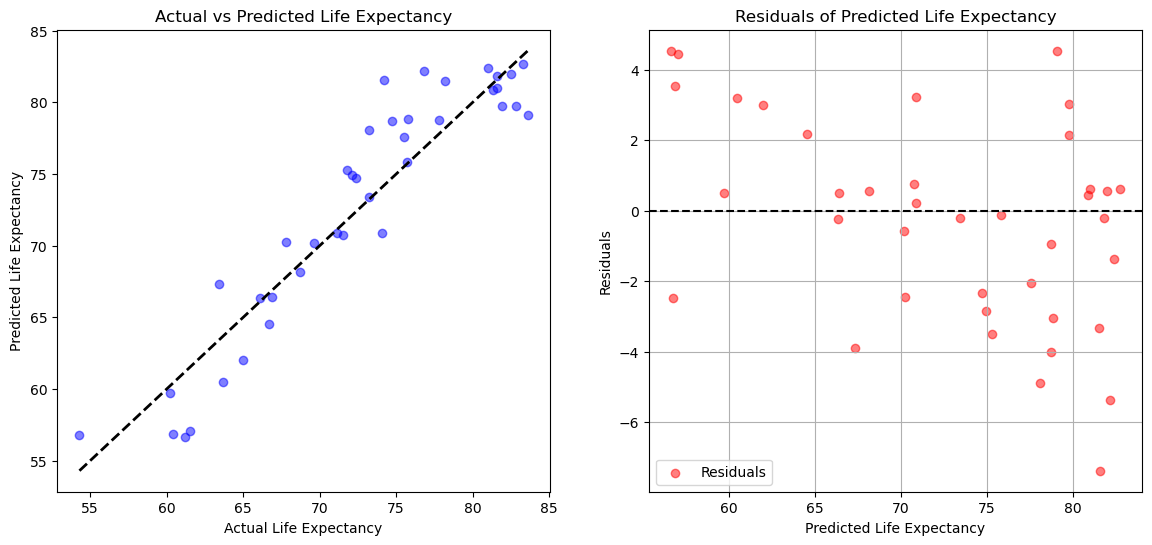

In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_test, alpha=0.5, color='blue', label='Actual vs Predicted')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, label='Perfect Prediction')
plt.xlabel('Actual Life Expectancy')
plt.ylabel('Predicted Life Expectancy')
plt.title('Actual vs Predicted Life Expectancy')

residuals = y_test - y_pred_test

plt.subplot(1, 2, 2)
plt.scatter(y_pred_test, residuals, color='red', alpha=0.5, label='Residuals')
plt.axhline(y=0, color='black', linestyle='--')
plt.xlabel('Predicted Life Expectancy')
plt.ylabel('Residuals')
plt.title('Residuals of Predicted Life Expectancy')
plt.legend()
plt.grid(True)
plt.show()